# Applied Physics Lab - II. Optical Pumping @ ELTE

In [273]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

In [2]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

In [6]:
PC = False
if PC:
    FSS_dir = 'D://GitHub/ELTE_Applied_Physics_2019/III. Liquid Scintillation Spectroscopy/'
    FSS_data = FSS_dir + 'data/'
    figsave_dir = FSS_dir + 'Documentation/report/src/images/'
else:
    FSS_dir = 'C://Users/masterdesky/Documents/GitHub/ELTE_Applied_Physics_2019/III. Liquid Scintillation Spectroscopy/'
    FSS_data = FSS_dir + 'data/'
    figsave_dir = FSS_dir + 'Documentation/report/src/images/'

figsave_format = 'pdf'
figsave_dpi = 200
    
# Bold print
b1 = '\033[1m'
b0 = '\033[0m'

### $^{14}$C data

In [151]:
Q = 156.5
DPM = 120900

## Import data

In [124]:
os.listdir(FSS_data)

['fss_20191010a_1.dat', 'fss_20191010a_2.dat', 'fss_20191010a_3.dat']

In [170]:
def read_data_files(file):
    
    bins = {}
    
    with open(file, mode='rt') as f:
        for line in f:

            # Dataline format:
            # "bin;v;v;v;..."
            # 
            s = line.split(';')
            # The first element will contain the bin label, while
            # the other elements contains the bin values
            # s[0] == bin
            # s[i != 0] == values
            s[0] = s[0].replace(',', '.')
            bins[float(s[0])-0.25] = [int(x) for x in s[1:]]

    # Convert to pandas DataFrame
    df = pd.DataFrame(data=bins)
    
    return df

In [247]:
data_1 = read_data_files(file=(FSS_data + os.listdir(FSS_data)[0]))
data_2 = read_data_files(file=(FSS_data + os.listdir(FSS_data)[1]))
data_3 = read_data_files(file=(FSS_data + os.listdir(FSS_data)[2]))
data = data_1.append(data_2, ignore_index=True).append(data_3, ignore_index=True)
data = data.T

In [248]:
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0.25,15,32,25,25,19,23,16,15,30,20,...,25,20,15,14,1439,17,17,22,30,30
0.75,149,139,134,121,143,137,145,123,123,150,...,137,138,150,118,1371,129,136,140,110,135
1.25,484,449,489,452,466,483,492,508,485,489,...,465,450,426,457,1450,483,490,435,457,482
1.75,776,755,774,783,768,754,789,757,749,793,...,780,748,780,786,1384,748,776,834,742,792
2.25,944,964,963,982,1001,992,985,1003,987,1027,...,956,975,1024,957,1432,958,1001,976,1000,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248.25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248.75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249.25,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop errorous measurements

In [249]:
for i in np.where(data.iloc[0].values > 100)[0]:
    del data[i]

data.columns = [i for i in range(len(data.columns.values))]

In [251]:
data

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0.25,15,32,25,25,19,23,16,15,30,20,...,16,25,20,15,14,17,17,22,30,30
0.75,149,139,134,121,143,137,145,123,123,150,...,142,137,138,150,118,129,136,140,110,135
1.25,484,449,489,452,466,483,492,508,485,489,...,462,465,450,426,457,483,490,435,457,482
1.75,776,755,774,783,768,754,789,757,749,793,...,821,780,748,780,786,748,776,834,742,792
2.25,944,964,963,982,1001,992,985,1003,987,1027,...,964,956,975,1024,957,958,1001,976,1000,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248.25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248.75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249.25,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Calculate statistical data columns

In [252]:
data['mean'] = [np.mean(data.iloc[i]) for i in range(len(data.index))]
data['std'] = [np.std(data.iloc[i]) for i in range(len(data.index))]

In [253]:
data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,mean,std
0.25,15,32,25,25,19,23,16,15,30,20,...,20,15,14,17,17,22,30,30,20.122449,4.645999
0.75,149,139,134,121,143,137,145,123,123,150,...,138,150,118,129,136,140,110,135,137.877551,12.380037
1.25,484,449,489,452,466,483,492,508,485,489,...,450,426,457,483,490,435,457,482,467.571429,21.241469
1.75,776,755,774,783,768,754,789,757,749,793,...,748,780,786,748,776,834,742,792,777.285714,28.412673
2.25,944,964,963,982,1001,992,985,1003,987,1027,...,975,1024,957,958,1001,976,1000,975,980.755102,32.179205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.020408,0.139971
248.25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.061224,0.237332
248.75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.020408,0.139971
249.25,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.020408,0.139971


## Plot spectrums

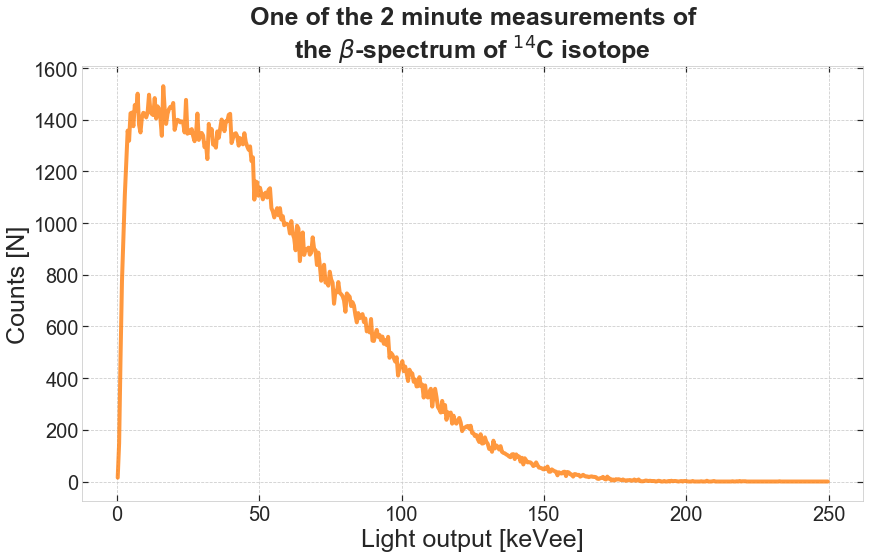

In [192]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14,nrows*8))

titlesize = 25
axislabelsize = 25
axisticksize = 20

axes.plot(data.index, data[0],
          lw=4, color='tab:orange', alpha=0.8)

axes.set_title('One of the 2 minute measurements of\nthe $\\beta$-spectrum of $^{14}$C isotope', fontsize=titlesize, fontweight='bold')
axes.set_xlabel('Light output [keVee]', fontsize=axislabelsize)
axes.set_ylabel('Counts [N]', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

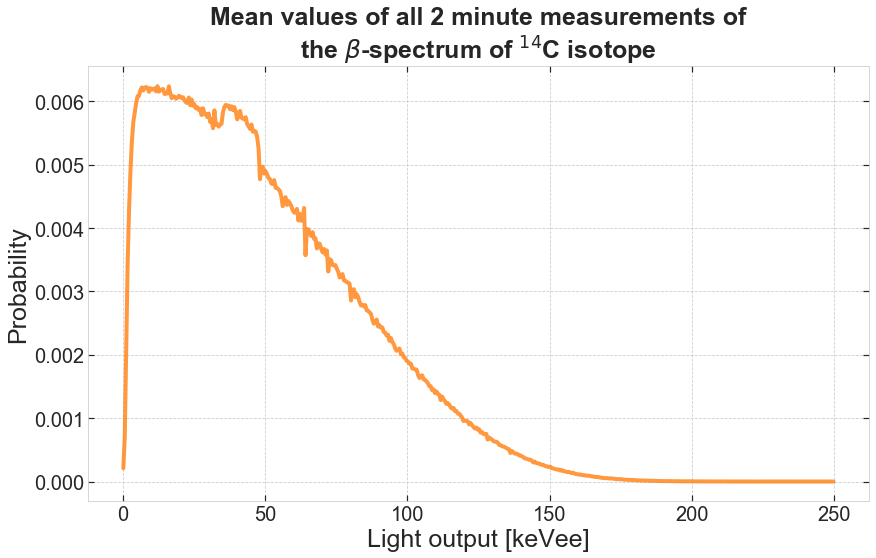

In [193]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14,nrows*8))

titlesize = 25
axislabelsize = 25
axisticksize = 20

axes.plot(data.index, data['mean']/np.sum(data['mean']),
          lw=4, color='tab:orange', alpha=0.8)

axes.set_title('Mean values of all 2 minute measurements of\nthe $\\beta$-spectrum of $^{14}$C isotope', fontsize=titlesize, fontweight='bold')
axes.set_xlabel('Light output [keVee]', fontsize=axislabelsize)
axes.set_ylabel('Probability', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

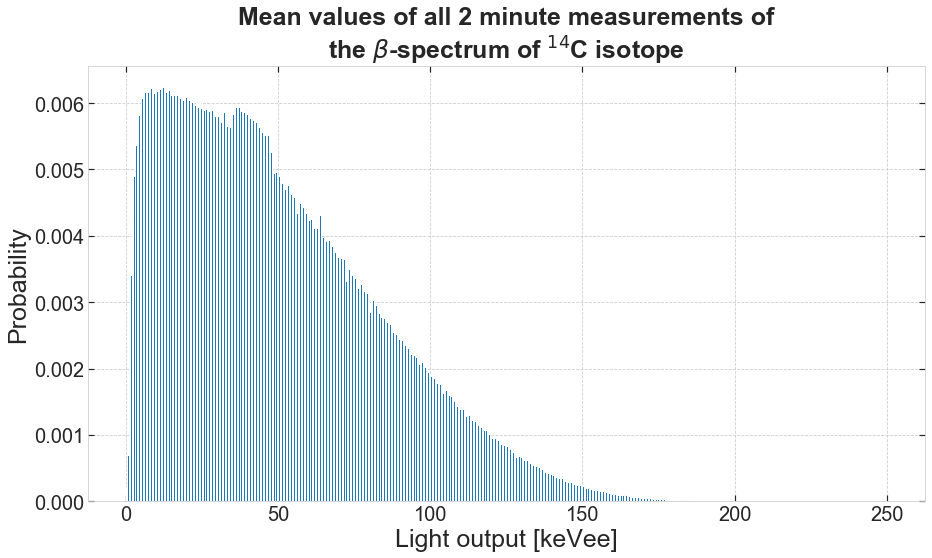

In [194]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*15,nrows*8))

titlesize = 25
axislabelsize = 25
axisticksize = 20

axes.bar(data.index, data['mean']/np.sum(data['mean']),
         width=0.5, align='center', color='tab:blue', alpha=1.0,)

axes.set_title('Mean values of all 2 minute measurements of\nthe $\\beta$-spectrum of $^{14}$C isotope', fontsize=titlesize, fontweight='bold')
axes.set_xlabel('Light output [keVee]', fontsize=axislabelsize)
axes.set_ylabel('Probability', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()

### Calculate CPM

In [195]:
CPM = (0.5 * data['mean'].values).sum() / 2
eta = CPM / DPM
print(b1 + 'Measured CPM : ' + b0 + '{0:.0f}'.format(CPM))
print(b1 + 'Measured eta : ' + b0 + '{0:.3f}%'.format(eta*100))

Measured CPM : 57837
Measured eta : 47.838%


### Calculate wheter if $\left< E \right> = \frac{Q}{3}$

In [219]:
E_pred = (data.index.values * data['mean'].values).sum()/data['mean'].sum()
E_grtr = Q/3
diff = np.abs(E_pred - E_grtr)

print(b1 + 'Difference from groundtruth value is ' + b0 + '{0:.2f} %'.format(diff/E_grtr * 100))

Difference from groundtruth value is 4.35 %


### Test wheter if $\sqrt{N} \approx \sigma$

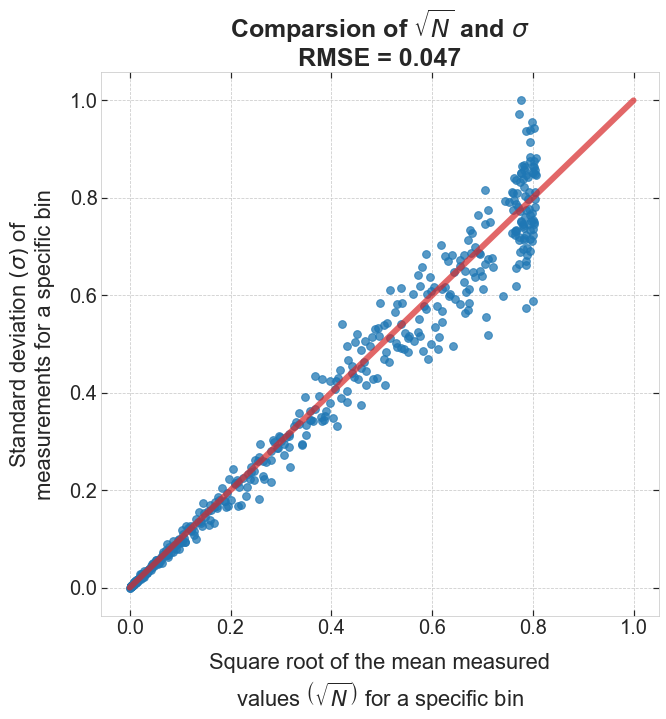

In [285]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))

titlesize = 25
axislabelsize = 22
axisticksize = 20
labelpad = 15

std_1 = np.sqrt(data['mean'].values)
std_2 = data['std'].values

norm = np.max([std_1, std_2])

axes.scatter(std_1/norm, std_2/norm,
             color='tab:blue', s=60, alpha=0.75)
axes.plot([0,1],[0,1], color='tab:red', lw=6, alpha=0.7)

rmse = np.sqrt(mean_squared_error(std_1/norm, std_2/norm))

axes.set_title('Comparsion of $\sqrt{N}$ and $\sigma$\n' + 'RMSE = {0:.3f}'.format(rmse),
               fontsize=titlesize, fontweight='bold')
axes.set_xlabel('Square root of the mean measured\nvalues $\\left( \\sqrt{N} \\right)$ for a specific bin',
                fontsize=axislabelsize, labelpad=labelpad)
axes.set_ylabel('Standard deviation $\\left( \\sigma \\right)$ of\nmeasurements for a specific bin',
                fontsize=axislabelsize, labelpad=labelpad)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

plt.show()